<a href="https://colab.research.google.com/github/N-Chetan3/Clap-Detector/blob/main/Clap_Keyword_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔊 Clap Detection Using Energy-Based Analysis



This project detects sharp sounds (e.g., hand claps) in an uploaded audio file using short-time energy analysis.

High-energy bursts correspond to peaks typically caused by claps or stressed syllables in speech.

In [2]:
# Install & Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import find_peaks
from google.colab import files
from IPython.display import Audio

In [3]:
#  Upload Audio File
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

Saving Voice 005.wav to Voice 005.wav


In [4]:
#  Load & Preview Audio
y, sr = librosa.load(file_path, sr=None)
duration = len(y) / sr
print(f"Loaded: {file_path}")
print(f"Duration: {duration:.2f} seconds | Sampling Rate: {sr} Hz")
Audio(y, rate=sr)

Loaded: Voice 005.wav
Duration: 6.78 seconds | Sampling Rate: 44100 Hz


In [5]:
#  Compute Short-Time Energy
frame_size = 1024
hop_length = 512
energy_raw = np.array([
    np.sum(y[i:i+frame_size]**2)
    for i in range(0, len(y), hop_length)
])
energy_norm = energy_raw / np.max(energy_raw)
times = librosa.frames_to_time(np.arange(len(energy_raw)), sr=sr, hop_length=hop_length)

In [6]:
#  Use an Energy Threshold (To detect claps)
threshold = 0.5
peaks, _ = find_peaks(energy_norm, height=threshold, distance=5)
peak_times = times[peaks]

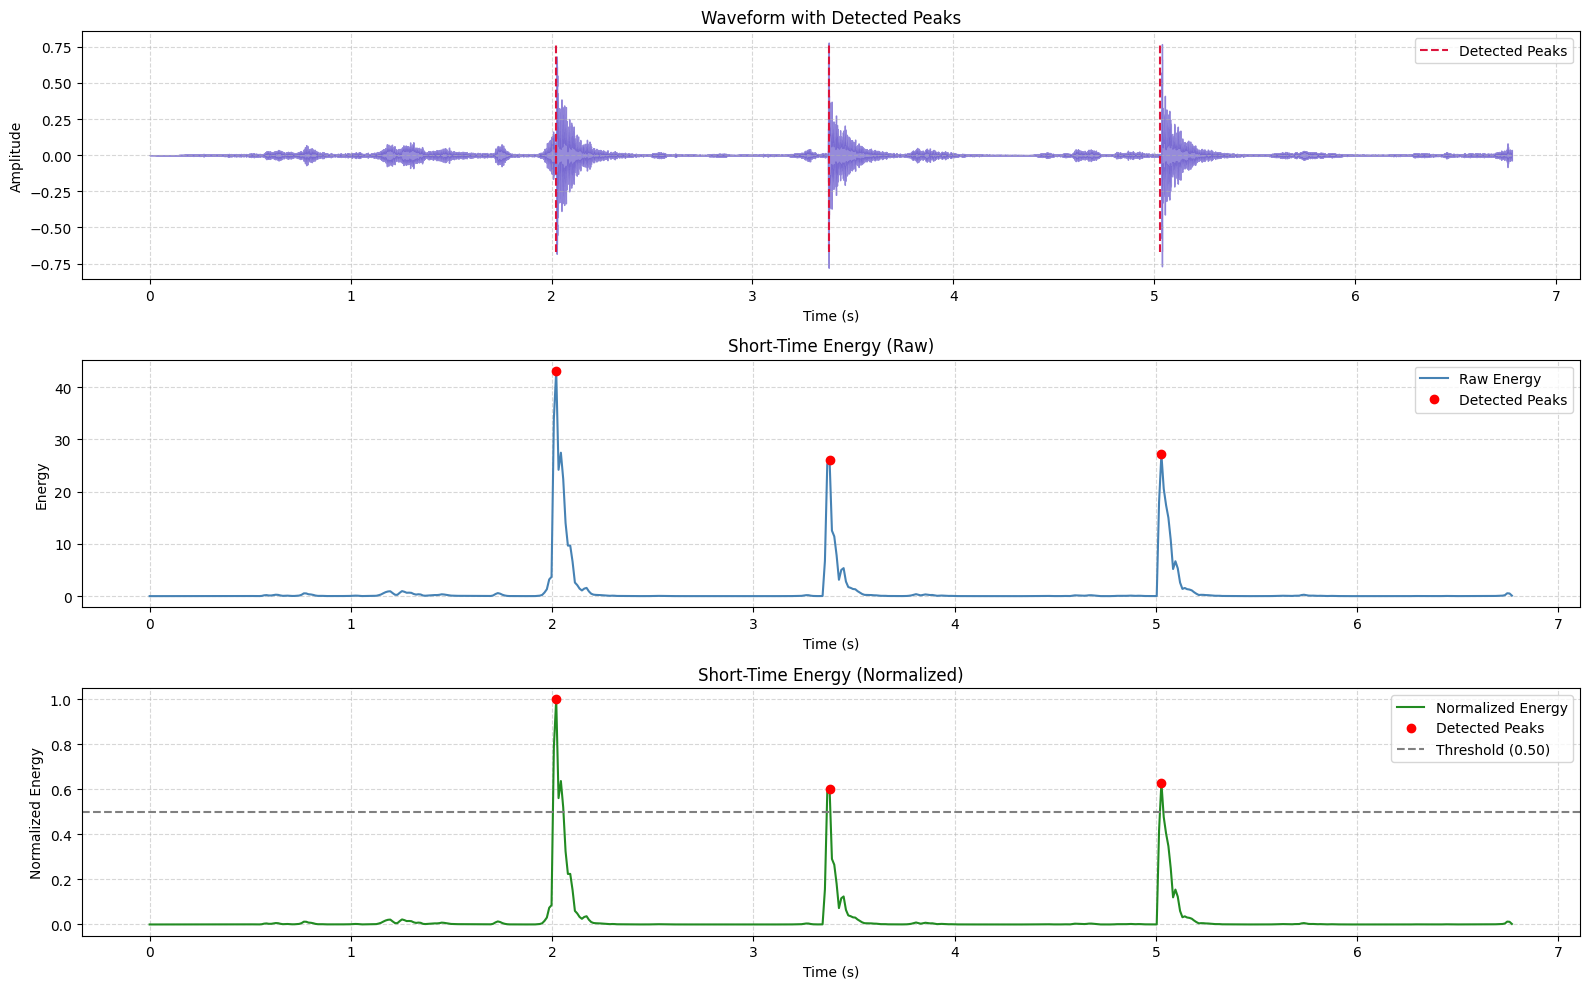

In [7]:
#  Plot Results
plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.7, color='slateblue')
plt.vlines(peak_times, ymin=min(y), ymax=max(y), color='crimson', linestyle='--', label='Detected Peaks')
plt.title('Waveform with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(times, energy_raw, color='steelblue', label='Raw Energy')
plt.plot(times[peaks], energy_raw[peaks], 'ro', label='Detected Peaks')
plt.title('Short-Time Energy (Raw)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(times, energy_norm, color='forestgreen', label='Normalized Energy')
plt.plot(times[peaks], energy_norm[peaks], 'ro', label='Detected Peaks')
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('Short-Time Energy (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Energy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Show Detected Peak Timestamps
print("\n Detected peak timestamps (in seconds):")
for t in peak_times:
    print(f"• {t:.2f} s")


 Detected peak timestamps (in seconds):
• 2.02 s
• 3.38 s
• 5.03 s


Conclusion

This notebook detects sharp sound events based on energy analysis. Try it with your own audio.
